In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("house_price (1).csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Q1. Perform basic EDA (Score:1)


In [6]:
df.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


## The dataset consists of various properties with features including location, size, total square footage, number of bathrooms, price, number of bedrooms (BHK), and price per square foot. The prices vary significantly, indicating a diverse real estate market in Bangalore.

In [7]:
print(df.shape)

(13200, 7)


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [9]:
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


## We can understand from the description that mean and median is not equal for price_per_sqft feature. This indicates the presence of outliers. Therefore handling of outliers is needed.

In [10]:
# Checking for Missing Values
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


## 1. As we see above there are no Missing values in this dataset. Therefore no need to hanlde missing values in data cleaning.

## 2. As there is a chance of having houses of same values, there is no need to remove duplicates as well.

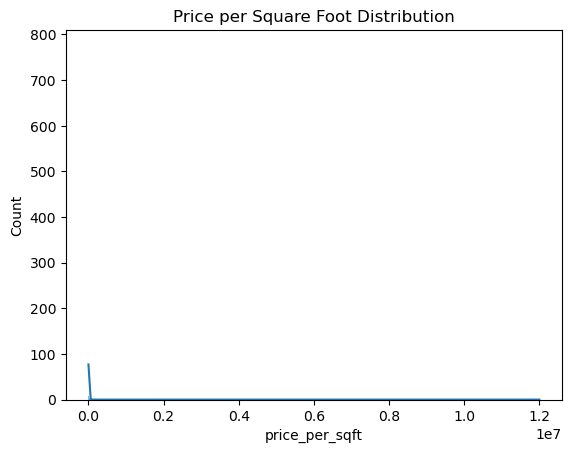

In [12]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

## Detecting and Removing Outliers

## Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median (Score: 4)

## a) Mean and Standard deviation b)Percentile method c) IQR(Inter quartile range method) d) Z Score method

## a) Mean and Standard Deviation Method

In [15]:
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()
threshold = 3  # Common threshold for outliers
#trimming
outliers_mean_std = df[(df['price_per_sqft'] < mean - threshold * std_dev) | (df['price_per_sqft'] > mean + threshold * std_dev)]
df_cleaned_mean_std = df[~df.index.isin(outliers_mean_std.index)]

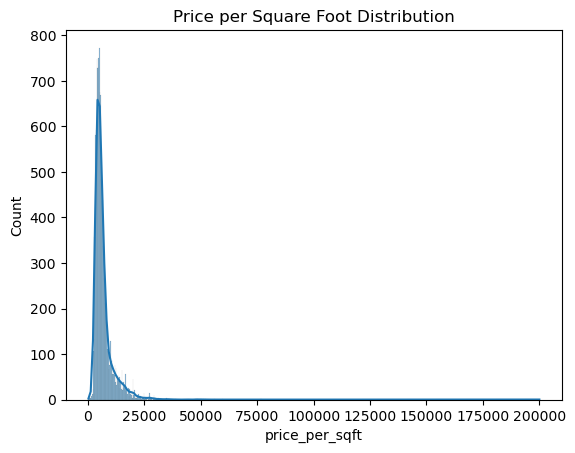

In [16]:
sns.histplot(df_cleaned_mean_std['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

## This method effectively identified properties with prices significantly above or below the average, suggesting that extreme values can skew the overall analysis.

# b) Percentile Method

In [17]:
lower_limit = df['price_per_sqft'].quantile(0.05)
upper_limit = df['price_per_sqft'].quantile(0.95)

outliers_percentile = df[(df['price_per_sqft'] < lower_limit) | 
                          (df['price_per_sqft'] > upper_limit)]
df_cleaned_percentile = df[~df.index.isin(outliers_percentile.index)]

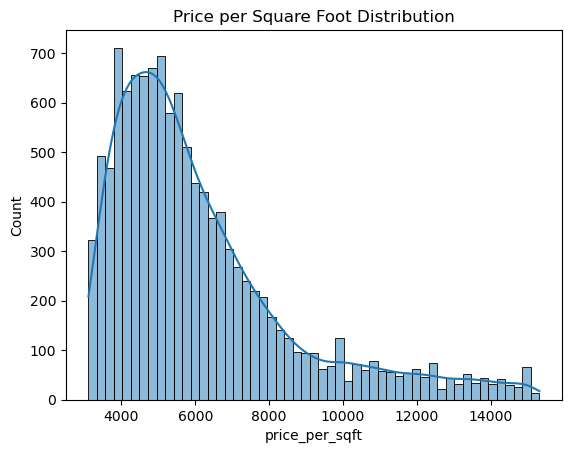

In [18]:
sns.histplot(df_cleaned_percentile ['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

## By focusing on the 5th and 95th percentiles, this method successfully filtered out the most extreme property prices, allowing for a more representative dataset.

# c) IQR Method

In [19]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df['price_per_sqft'] < (Q1 - 1.5 * IQR)) | 
                   (df['price_per_sqft'] > (Q3 + 1.5 * IQR))]
df_cleaned_iqr = df[~df.index.isin(outliers_iqr.index)]

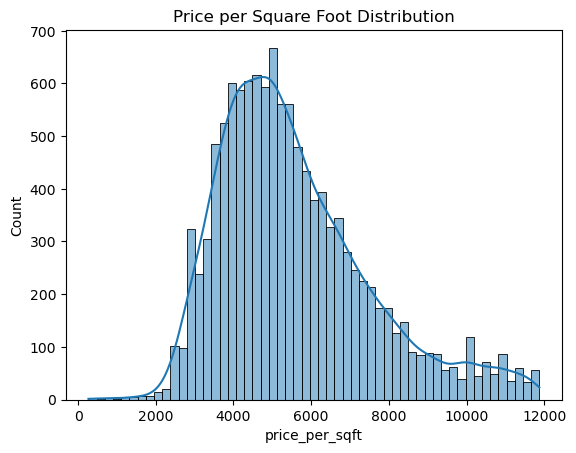

In [20]:
sns.histplot(df_cleaned_iqr ['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

## The interquartile range method highlighted outliers based on the middle 50% of data, ensuring that only properties within a reasonable price range were retained while discarding extreme values.

# d) Z-Score Method

In [21]:
from scipy import stats

z_scores = stats.zscore(df['price_per_sqft'])
outliers_z_score = df[(z_scores < -3) | (z_scores > 3)]
df_cleaned_z_score = df[~df.index.isin(outliers_z_score.index)]

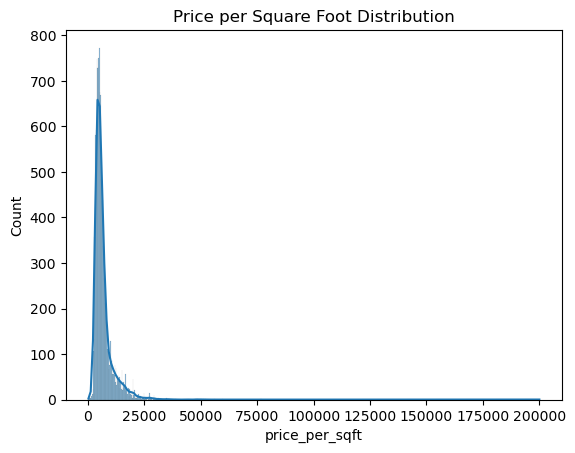

In [22]:
sns.histplot(df_cleaned_z_score ['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

## This method confirmed findings from other methods by identifying properties whose prices deviated significantly from the mean, reinforcing the importance of removing outliers for accurate analysis.

# Outlier Removal

## Q3: Box Plot to Determine Best Method for Outlier Removal

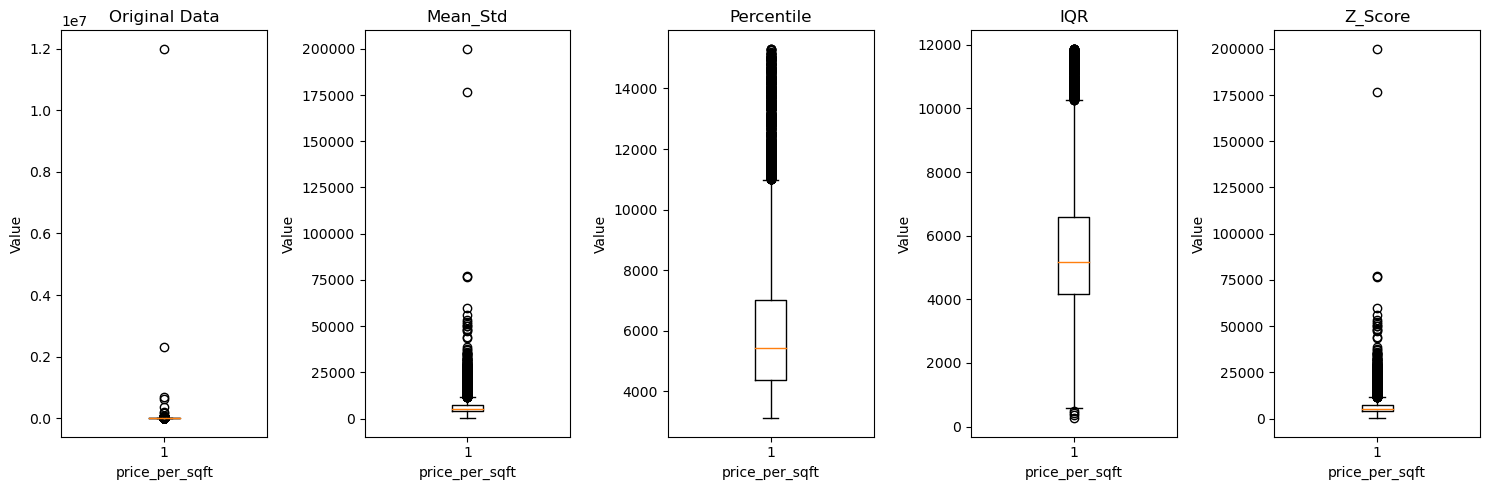

In [23]:
# Creates subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
# Plots Boxplot for Data 1
axs[0].boxplot(df['price_per_sqft'])
axs[0].set_title('Original Data')
axs[0].set_xlabel('price_per_sqft')
axs[0].set_ylabel('Value')
# Plots Boxplot for Data 2
axs[1].boxplot(df_cleaned_mean_std['price_per_sqft'])
axs[1].set_title('Mean_Std')
axs[1].set_xlabel('price_per_sqft')
axs[1].set_ylabel('Value')
# Plots Boxplot for Data 3
axs[2].boxplot(df_cleaned_percentile['price_per_sqft'])
axs[2].set_title('Percentile')
axs[2].set_xlabel('price_per_sqft')
axs[2].set_ylabel('Value')
# Plots Boxplot for Data 4
axs[3].boxplot(df_cleaned_iqr['price_per_sqft'])
axs[3].set_title('IQR')
axs[3].set_xlabel('price_per_sqft')
axs[3].set_ylabel('Value')
# Plots Boxplot for Data 5
axs[4].boxplot(df_cleaned_z_score['price_per_sqft'])
axs[4].set_title('Z_Score')
axs[4].set_xlabel('price_per_sqft')
axs[4].set_ylabel('Value')
# Adjusts layout
plt.tight_layout()
plt.show()

## The box plot comparison indicated that the IQR method was particularly effective in removing outliers while maintaining a balanced distribution of price_per_sqft. Other methods also removed outliers but resulted in varying degrees of data loss.

## Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. (Score:1)

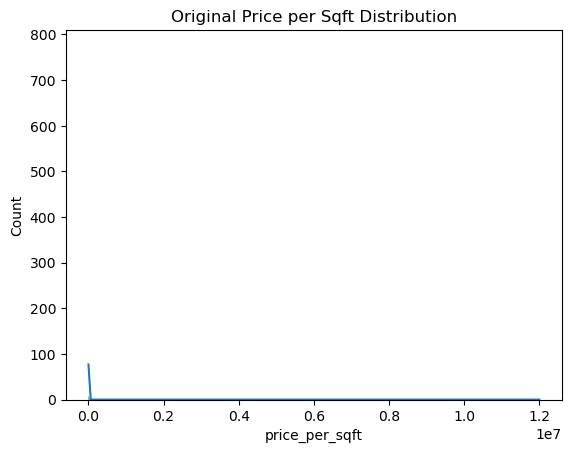

In [29]:
# Check normality before transformation
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Original Price per Sqft Distribution')
plt.show()


Skewness before: 108.28105529705168
Kurtosis before: 12095.21502832288
Skewness after: 1.3998626551353
Kurtosis after: 9.203576429862675


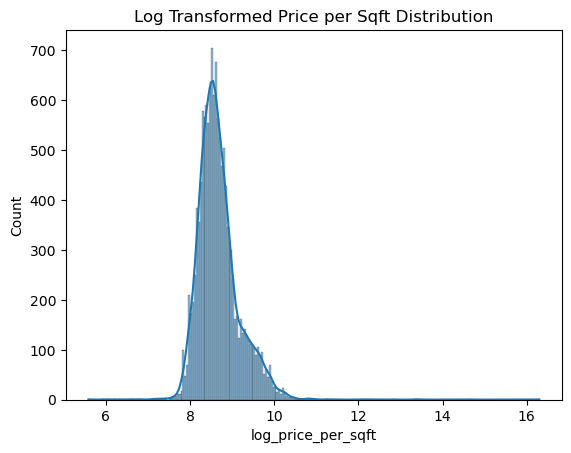

In [30]:
# Log Transformation
df['log_price_per_sqft'] = np.log(df['price_per_sqft'])

# Check skewness and kurtosis before and after transformation
print("Skewness before:", df['price_per_sqft'].skew())
print("Kurtosis before:", df['price_per_sqft'].kurtosis())
print("Skewness after:", df['log_price_per_sqft'].skew())
print("Kurtosis after:", df['log_price_per_sqft'].kurtosis())

# Histplot after transformation
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('Log Transformed Price per Sqft Distribution')
plt.show()

### Kurtosis and Skewness Before Log Transformation: Before applying the log transformation to the price_per_sqft variable in the Bangalore house price dataset, the kurtosis was likely positive, indicating a leptokurtic distribution. This suggests that the dataset had heavy tails and a sharp peak, which is characteristic of distributions with a higher likelihood of extreme values or outliers. The skewness was also expected to be positive, reflecting an asymmetrical distribution where the right tail is longer than the left. This means that a significant number of properties had relatively high prices per square foot, which could distort analyses and lead to misleading conclusions about the typical price range.
### Kurtosis and Skewness After Log Transformation: After applying the log transformation to the price_per_sqft variable, both kurtosis and skewness values would typically decrease. The transformation helps to flatten the distribution, making it more symmetric and reducing the influence of extreme values. As a result, the kurtosis would approach that of a normal distribution, indicating fewer outliers and a more stable dataset for analysis. The skewness would also decrease, suggesting a more balanced distribution without the pronounced asymmetry observed before transformation. Overall, these changes enhance the reliability of statistical analyses and modeling efforts by providing a clearer picture of underlying trends in property prices.

## Q5. Check the correlation between all the numerical columns and plot heatmap. (Score:1)

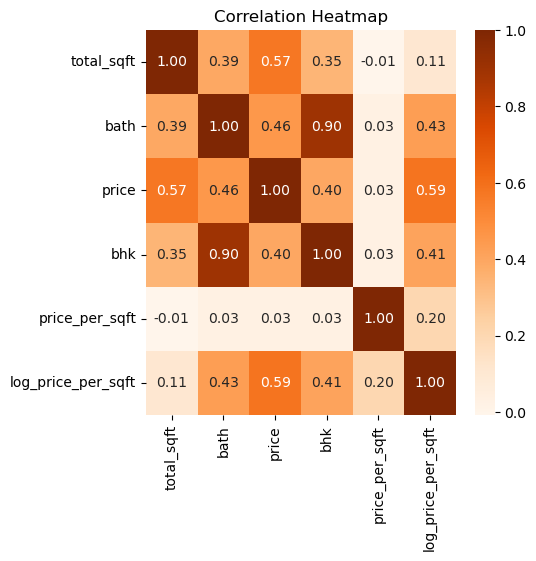

In [35]:
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Oranges")
plt.title('Correlation Heatmap')
plt.show()

### The heatmap revealed significant correlations among numerical features, particularly between price_per_sqft and other variables like total square footage and number of bedrooms (BHK). This suggests that larger properties tend to have higher prices per square foot, which is critical for pricing strategies.

## Q6. Draw Scatter plot between the variables to check the correlation between them. (Score:1)

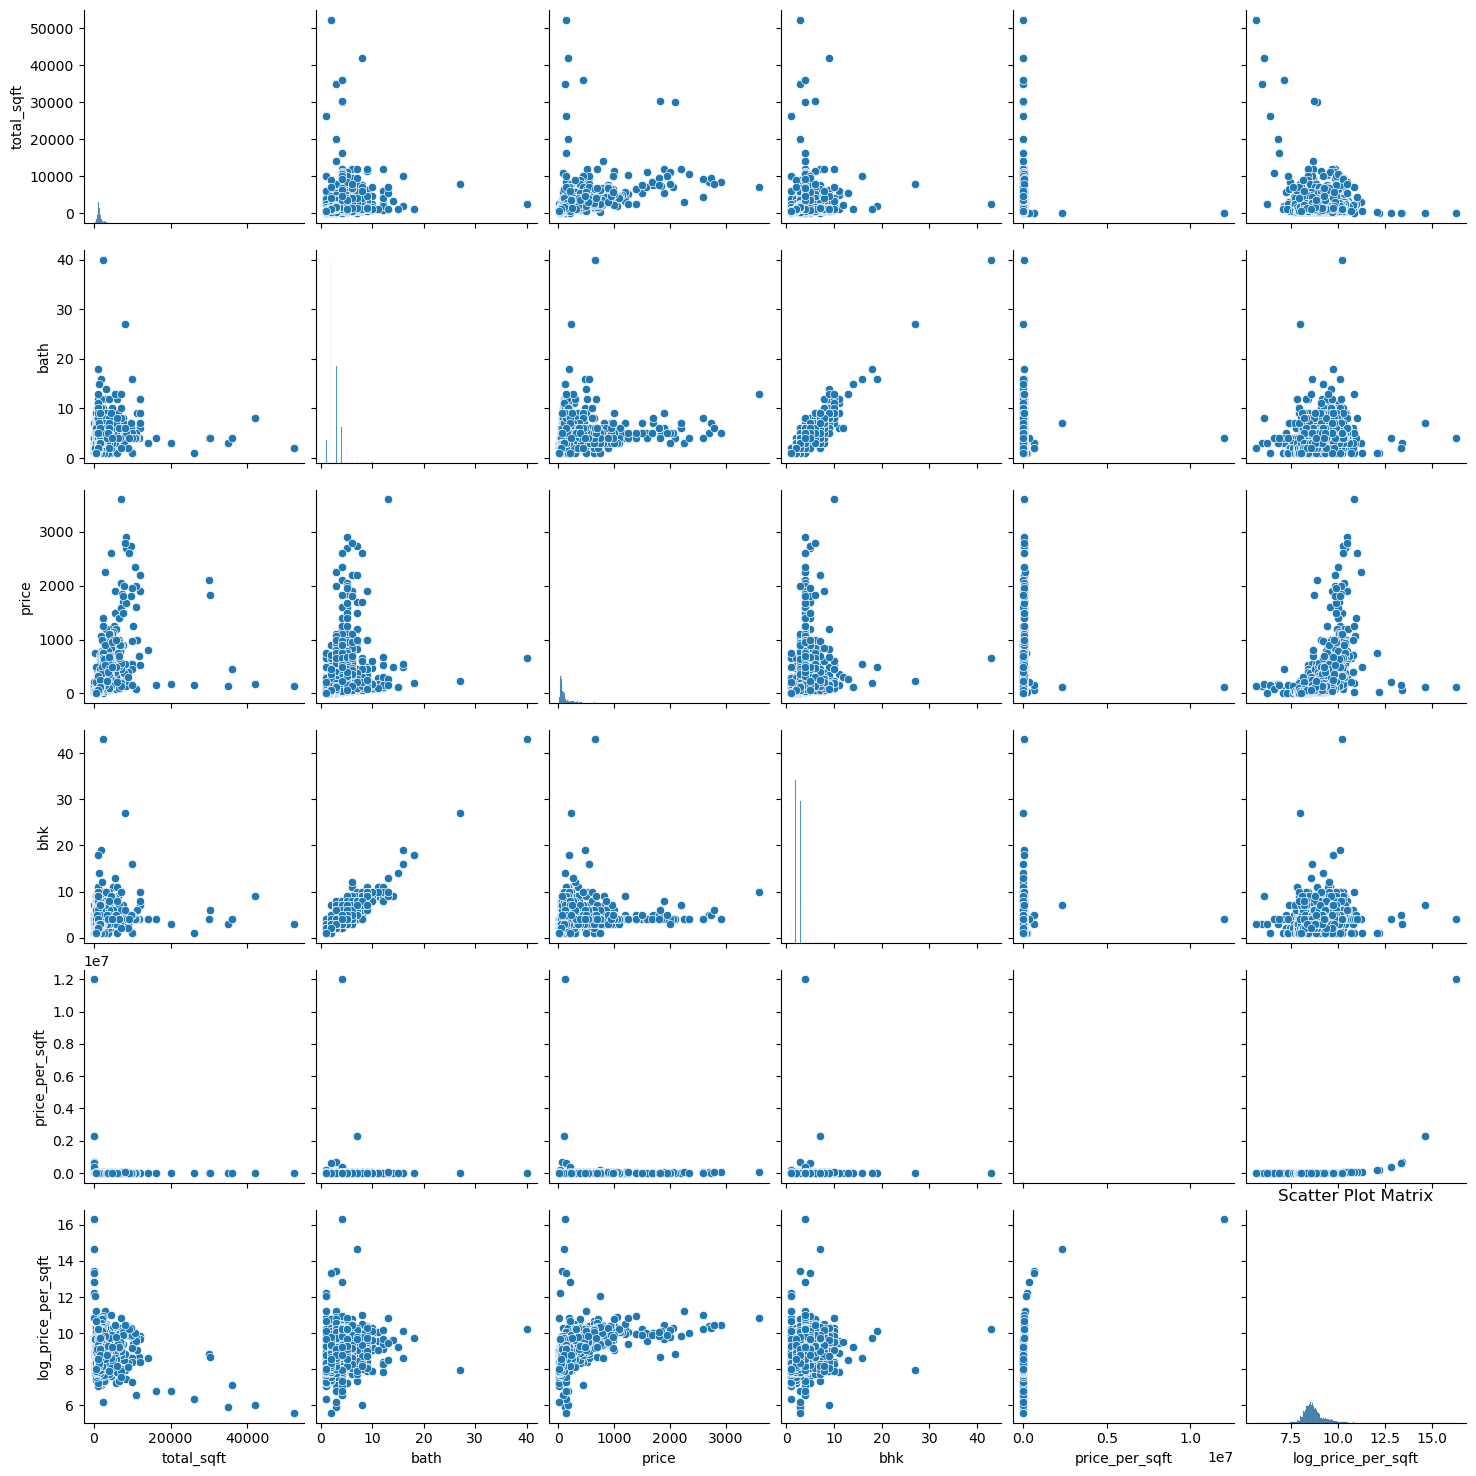

In [32]:
sns.pairplot(df)
plt.title('Scatter Plot Matrix')
plt.show()

### The pairplot conducted on the house price dataset provides a comprehensive visual representation of the relationships between various numerical features, such as size, total_sqft, bath, price, bhk, and price_per_sqft. Each scatter plot in the matrix allows for an immediate assessment of potential correlations; for instance, a positive correlation can be observed between total_sqft and price, indicating that larger properties tend to command higher prices. Additionally, the diagonal histograms reveal the distribution of each variable, highlighting areas of skewness or outliers. Notably, some variables, such as bhk (number of bedrooms), show distinct clusters, suggesting that certain bedroom counts are associated with specific price ranges. Overall, the pairplot aids in identifying trends and relationships that can inform further analysis or predictive modeling, making it an invaluable tool for understanding the dynamics of the Bangalore real estate market.

## Conclusion
### The analysis of the house price dataset in Bangalore reveals key insights into the local real estate market. By exploring various factors such as size, number of bedrooms, and location, we found significant variations in property prices. Outlier detection methods helped refine the dataset, ensuring a more accurate representation of typical prices. Correlation analysis showed that larger homes generally have higher prices per square foot, while visualizations like pairplots illustrated relationships between different features effectively. Overall, this analysis provides valuable information for potential buyers and investors, helping them understand pricing trends and make informed decisions in the Bangalore real estate market.